In [113]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import joblib

In [114]:
df=pd.read_csv('world happiness report.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [115]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [116]:
df.shape

(158, 12)

In [117]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

there are no nan values present in the data

In [118]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [119]:
df1=df[['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]

In [120]:
df1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


as the country and region data does not contribute any insight to predict the hapiness score, heance creating df1

# visualization and EDA

<AxesSubplot:>

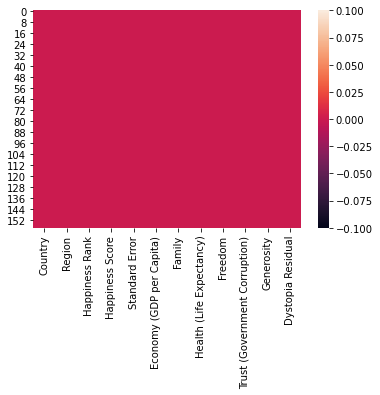

In [121]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

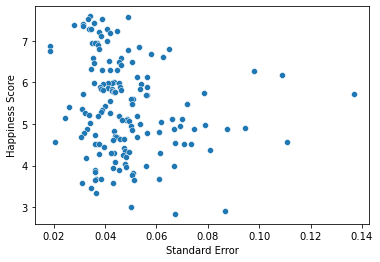

In [122]:
sns.scatterplot(x='Standard Error',y='Happiness Score',data=df)

there is moderate are no relation between standard error and happiness score

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

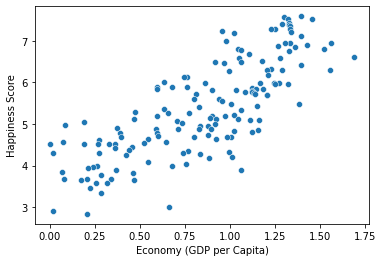

In [123]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df)

this shows positive correlation in the data

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

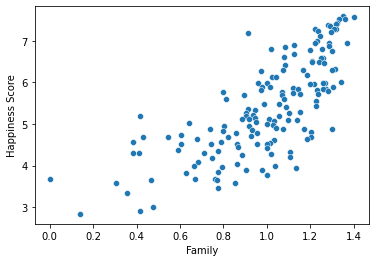

In [124]:
sns.scatterplot(x='Family',y='Happiness Score',data=df)

In [125]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

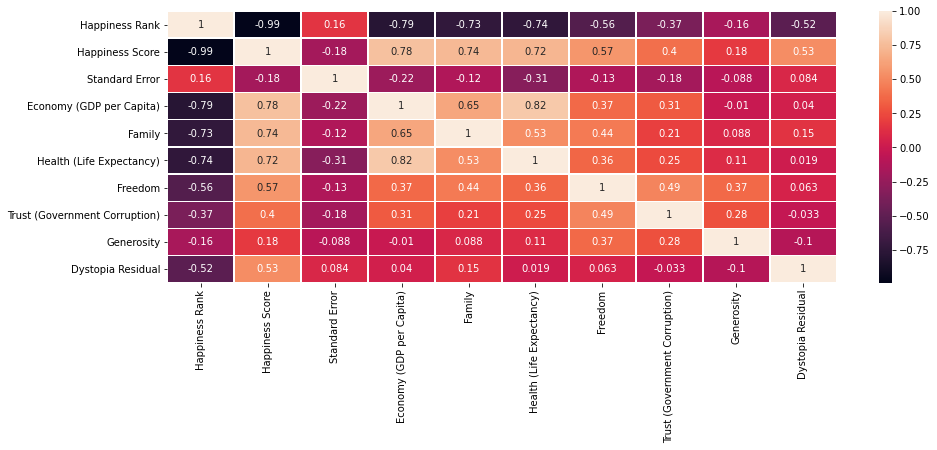

In [126]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

We can see that happiness rank and standard error is having weak correlation with happiness score

In [127]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:>

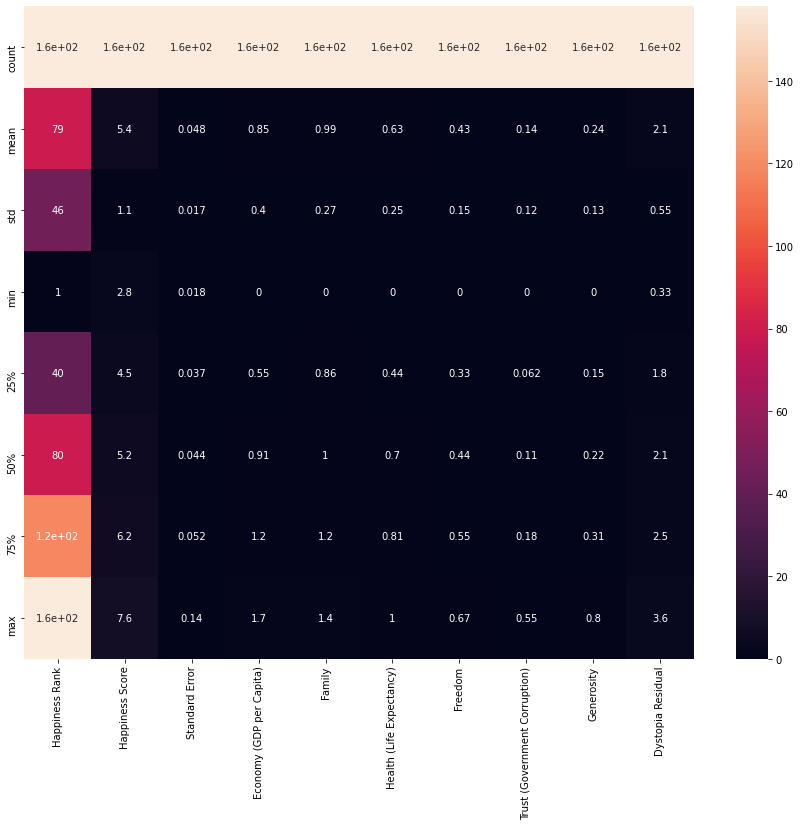

In [128]:
plt.figure(figsize=(15,12))
sns.heatmap(df.describe(),annot=True)

Happiness Rank                      AxesSubplot(0.125,0.536818;0.110714x0.343182)
Happiness Score                  AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Family                           AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Health (Life Expectancy)         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Freedom                                AxesSubplot(0.125,0.125;0.110714x0.343182)
Trust (Government Corruption)       AxesSubplot(0.257857,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.390714,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.523571,0.125;0.110714x0.343182)
dtype: object

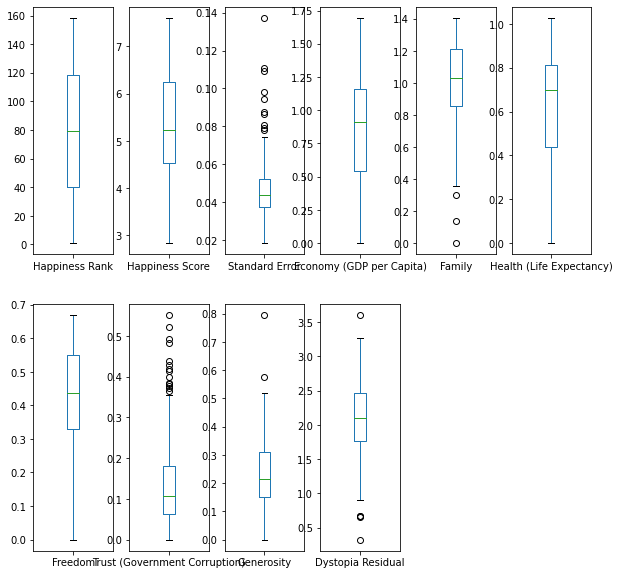

In [129]:
df.plot(kind='box',subplots=True, layout=(2,6),figsize=(10,10))

In [130]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Normal distribution curve

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Family', ylabel='Density'>

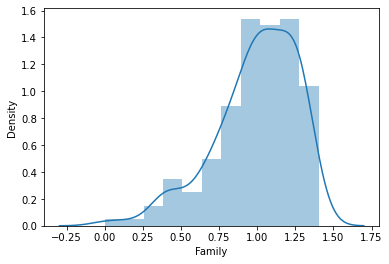

In [131]:
sns.distplot(df['Family'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

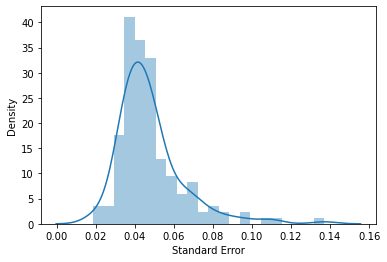

In [132]:
sns.distplot(df['Standard Error'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

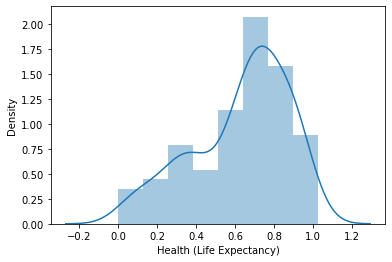

In [133]:
sns.distplot(df['Health (Life Expectancy)'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

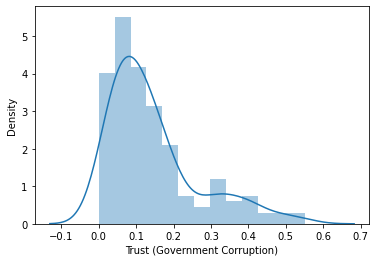

In [134]:
sns.distplot(df['Trust (Government Corruption)'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Generosity', ylabel='Density'>

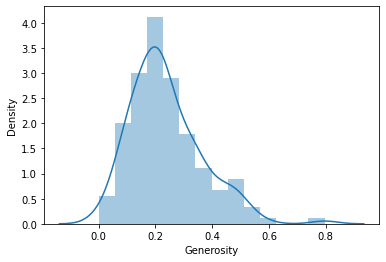

In [135]:
sns.distplot(df['Generosity'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

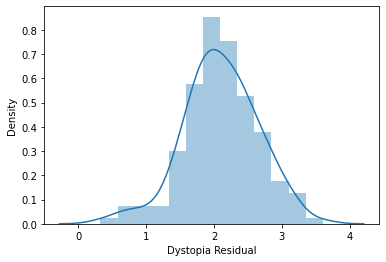

In [136]:
sns.distplot(df['Dystopia Residual'])

# Data cleaning

In [137]:
df1=df1.drop(['Happiness Rank','Standard Error'],axis=1)
df1

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


dropping happiness rank and standard error because rank dont have any correlation with the happiness score and standard error is having weak correlation as well as there are a alot of outliers present as well as skewness 

# Removing Outliers

In [138]:
from scipy.stats import zscore

In [139]:
z=np.abs(zscore(df1))
z

array([[1.93736005, 1.36962124, 1.32028142, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.91458063, 1.13522625, 1.51445776, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.88479215, 1.19286069, 1.36105403, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [2.0761992 , 0.45524543, 1.90108634, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.1646885 , 2.06756644, 2.1184666 , ..., 0.35771452, 0.31694987,
        0.48198451],
       [2.22251319, 1.58633379, 3.13472485, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [140]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([5, 6, 2, 5, 7, 2], dtype=int64))


In [141]:
z[27][5]

3.1646194851713774

In [142]:
df_new=df1[(z<3).all(axis=1)]
df_new

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [143]:
print(df1.shape)
df_new.shape

(158, 8)


(152, 8)

# data loss percent

In [144]:
loss_percent= (158-152)/158*100
print(loss_percent)

3.79746835443038


the data loss is not more that 10% so can move ahead

# model with outliers is df1 and model with desired outliers is df_new

In [145]:
x=df_new.iloc[:,1:]
y=df_new.iloc[:,0]

In [146]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [147]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 152, dtype: float64

# Transforming data to remove skewness


In [148]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [149]:
x

array([[ 1.49611066,  1.66761863,  1.48143363, ...,  1.82206989,
         0.65595135,  0.74453432],
       [ 1.19771755,  2.02101055,  1.52291872, ...,  0.35523025,
         1.57166845,  1.10426166],
       [ 1.27024567,  1.74015288,  1.06659878, ...,  1.95457488,
         0.97742359,  0.69531125],
       ...,
       [-1.35114937, -2.09149028, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.41833371, -2.01503268, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827055, -1.91154627, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

In [150]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.49611066,  1.66761863,  1.48143363, ...,  1.82206989,
         0.65595135,  0.74453432],
       [ 1.19771755,  2.02101055,  1.52291872, ...,  0.35523025,
         1.57166845,  1.10426166],
       [ 1.27024567,  1.74015288,  1.06659878, ...,  1.95457488,
         0.97742359,  0.69531125],
       ...,
       [-1.35114937, -2.09149028, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.41833371, -2.01503268, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827055, -1.91154627, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

# Predicting data

In [151]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [152]:
xtest.shape

(31, 7)

In [153]:
xtrain.shape

(121, 7)

In [154]:
ytest.shape

(31,)

In [155]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

0.9940292696532771

In [156]:
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.87716413 0.81937079 0.78622942 0.72068025 0.81981771]
0.8046524579842785
0.05117674499536365


In [157]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [158]:
dt=DecisionTreeRegressor()
rfr=RandomForestRegressor()

model=[lr,dt,rfr]


In [159]:
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    pred=m.predict(xtest)
    print('Accuracy score of ',m,'is :')
    print(m.score(xtrain,ytrain))

Accuracy score of  LinearRegression() is :
0.9940292696532771
Accuracy score of  DecisionTreeRegressor() is :
1.0
Accuracy score of  RandomForestRegressor() is :
0.9860454714836225


In [160]:
print(r2_score(ytest,pred))

0.9497541353133355


from the above we can see that Decision tree regressor is the most accurate model for this data

In [161]:
score=cross_val_score(dt,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[ -5.12016898 -12.97408333  -6.21122184 -10.41841147  -4.62449865]
-7.869676855009738
3.267796254756803


In [162]:
#saving the model
joblib.dump(dt,'dtfile.obj')

['dtfile.obj']

In [163]:
dt_for_joblib=joblib.load('dtfile.obj')

In [164]:
dt_for_joblib.predict(xtest)

array([5.987, 3.989, 4.874, 5.192, 4.971, 4.788, 6.786, 7.378, 6.75 ,
       6.81 , 4.252, 3.575, 5.098, 6.853, 6.302, 7.427, 6.798, 6.798,
       5.695, 5.194, 4.971, 6.13 , 5.975, 4.739, 5.192, 3.781, 6.798,
       5.695, 4.436, 5.36 , 5.007])

# We saved Decision tree regressor model for predicting happiness score based on the data provided